# **PROYECTO IA 1: PREDICCIÓN DE APROBACIÓN DE PRÉSTAMOS BANCARIOS**

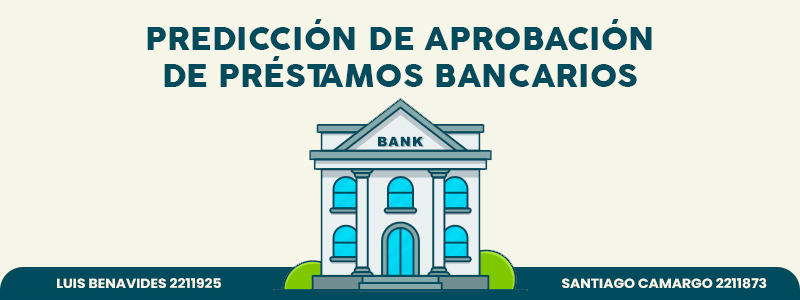

Luis Carlos Benavides Torres - 2211925

Santiago Camargo Ardila - 2211873

Este proyecto tiene como objetivo utilizar el siguiente conjunto de datos de 20,000 registros para predecir la aprobación de préstamos.

https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?select=Loan.csv

 El conjunto de datos incluye información sobre la edad, nivel de ingresos, historial crediticio, situación laboral, entre otros, lo que proporciona una base sólida para análisis predictivos y toma de decisiones en el ámbito crediticio.

## Montar Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Librerías

In [ ]:
import imageio
import numpy as np
import pandas as pd
import plotly as py
import plotly.express as px
# import plotly.graph_objs as go
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from IPython.display import HTML

# Using plotly + cufflinks in offline mode
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *



#Sección 1

## RECONOCIMIENTO DEL DATASET

In [ ]:
ruta_archivo = '/content/drive/MyDrive/proyecto_ia_2025_1/data/Loan.csv'
df = pd.read_csv(ruta_archivo)
#df.drop(columns=['ApplicationDate'], inplace=True)
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")
df.describe()

Rows: 20000, Columns: 35


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [ ]:
# @title FILTRAR REGISTROS NULOS
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())


Número de valores nulos por columna:
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
In

### DATOS PRINCIPALES DE ESTUDIO

* **Age:** Applicant's age
* **AnnualIncome:** Yearly income
* **CreditScore:** Creditworthiness score
* **LoanAmount:** Requested loan size
* **LoanDuration:** Loan repayment period
* **CreditCardUtilizationRate:** Credit card usage percentage
* **NumberOfOpenCreditLines:** Active credit lines
* **SavingsAccountBalance:** Savings account amount
* **CheckingAccountBalance:** Checking account funds
* **MonthlyIncome:** Income per month
* **InterestRate:** Applied interest rate
* **MonthlyLoanPayment:** Monthly loan payment
* **TotalDebtToIncomeRatio:** Total debt against income
* **LoanApproved:** Loan approval status
* **RiskScore:** Risk assessment score

##**Gráficas**

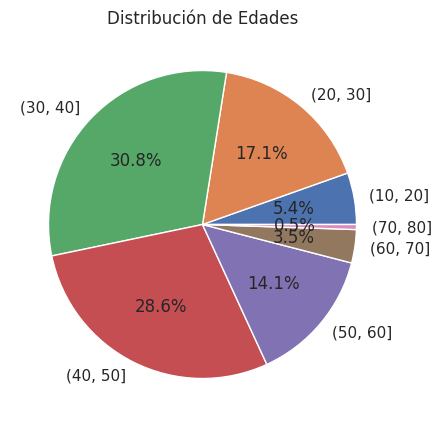

In [ ]:
 #@title Rangos de edad
bins = [10, 20, 30, 40, 50, 60, 70, 80]

# Crear una nueva columna con los grupos de edad
df['Age groups'] = pd.cut(df['Age'], bins=bins)

# Contar número de persona por grupos
conteo_edades = df['Age groups'].value_counts().sort_index()

# Graficar
plt.figure(figsize=(5, 5))
plt.pie(conteo_edades, labels=conteo_edades.index, autopct='%1.1f%%')
plt.title('Distribución de Edades')
plt.show()

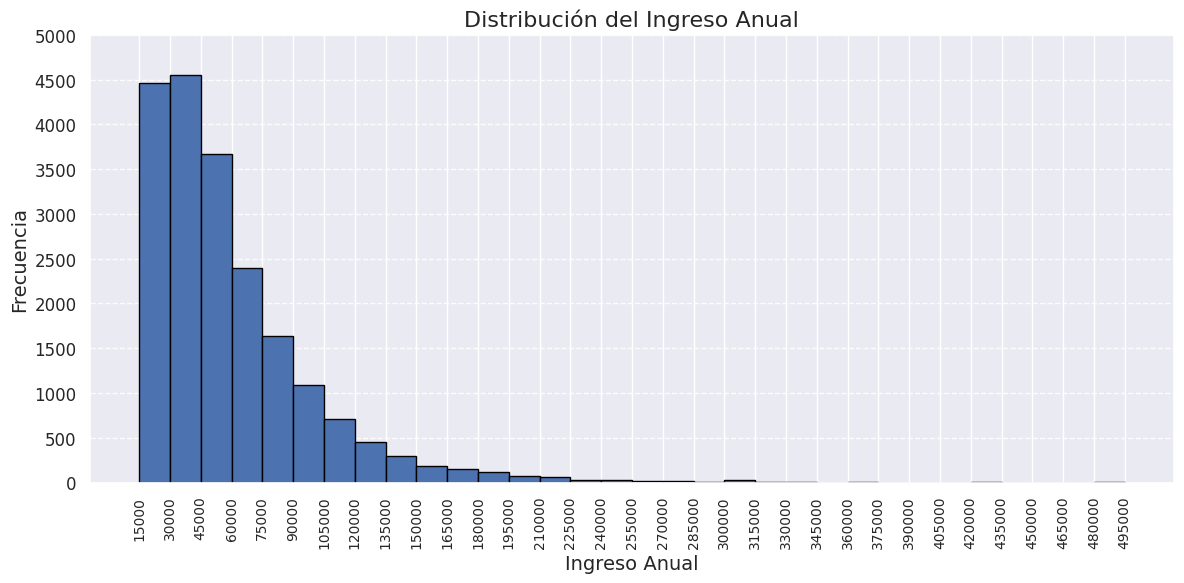

In [ ]:
# @title Ingresos Anuales - Annual Income
# Definir los bins (cada 15.000)
min_income = int(df['AnnualIncome'].min())
max_income = int(df['AnnualIncome'].max())
bins = np.arange(min_income, max_income + 15000, 15000)

# Creación del histograma
plt.figure(figsize=(12, 6))
plt.hist(df['AnnualIncome'], bins=bins, edgecolor='black')

# Títulos del gráfico y de los ejes
plt.title('Distribución del Ingreso Anual', fontsize=16)
plt.xlabel('Ingreso Anual', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Definir las etiquetas del eje X con los bins
xticks_labels = bins
plt.xticks(xticks_labels, fontsize=10, rotation=90)

# Personalizar las etiquetas del eje Y
max_freq = int(df['AnnualIncome'].value_counts(bins=bins).max())
yticks_labels = np.arange(0, max_freq + 500, 500)
plt.yticks(yticks_labels, fontsize=12)

# Cuadrícula en el eje Y
plt.grid(axis='y', linestyle='--', alpha=0.9)

# Mostrar el gráfico
plt.tight_layout()  # Ajusta el layout para que no se corten las etiquetas
plt.show()

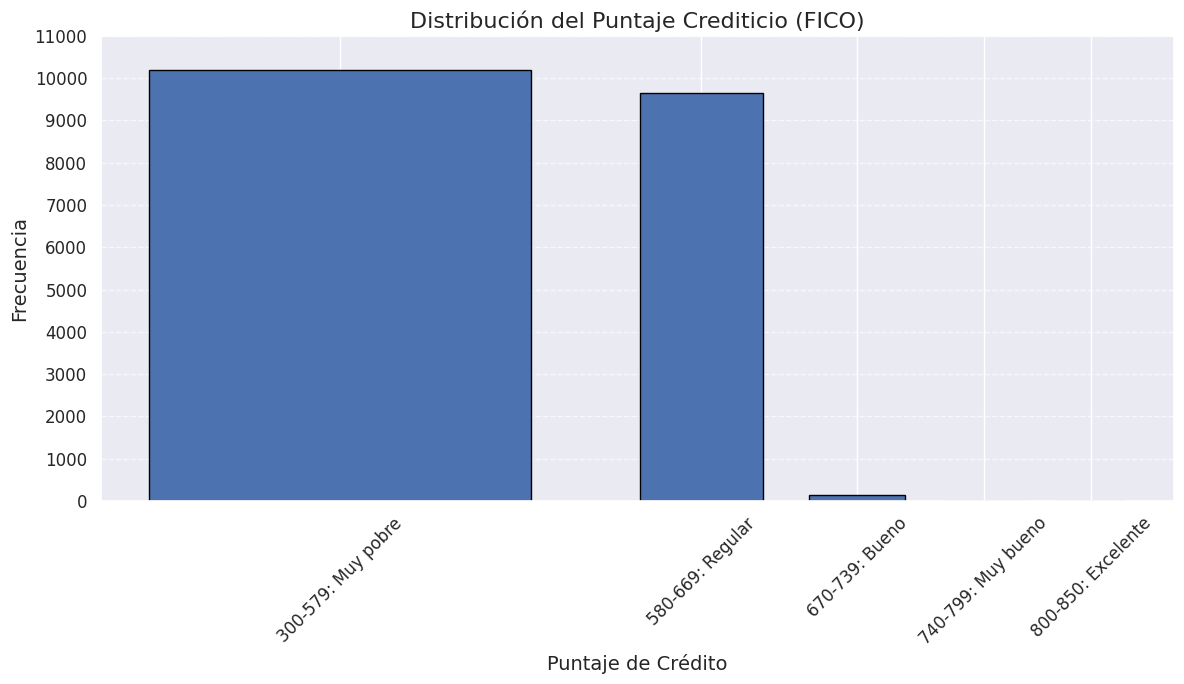

In [ ]:
# @title Puntaje Crediticio (FICO) - Credit Score
# Bins basados en los rangos de FICO
fico_bins = [300, 580, 670, 740, 800, 850]
fico_labels = ['300-579: Muy pobre', '580-669: Regular', '670-739: Bueno', '740-799: Muy bueno', '800-850: Excelente']

# Creación del histograma
plt.figure(figsize=(12, 7))
plt.hist(df['CreditScore'], bins=fico_bins,  edgecolor='black', rwidth=0.7)

# Títulos del gráfico y de los ejes
plt.title('Distribución del Puntaje Crediticio (FICO)', fontsize=16)
plt.xlabel('Puntaje de Crédito', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Personalizar las etiquetas del eje X
bin_centers = [(fico_bins[i] + fico_bins[i+1]) / 2 for i in range(len(fico_bins)-1)]
plt.xticks(bin_centers, labels=fico_labels, fontsize=12, rotation=45)

# Personalizar las etiquetas del eje Y
max_freq = df['CreditScore'].value_counts(bins=fico_bins).max()
yticks_labels = range(0, max_freq + 1000, 1000)
plt.yticks(yticks_labels, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

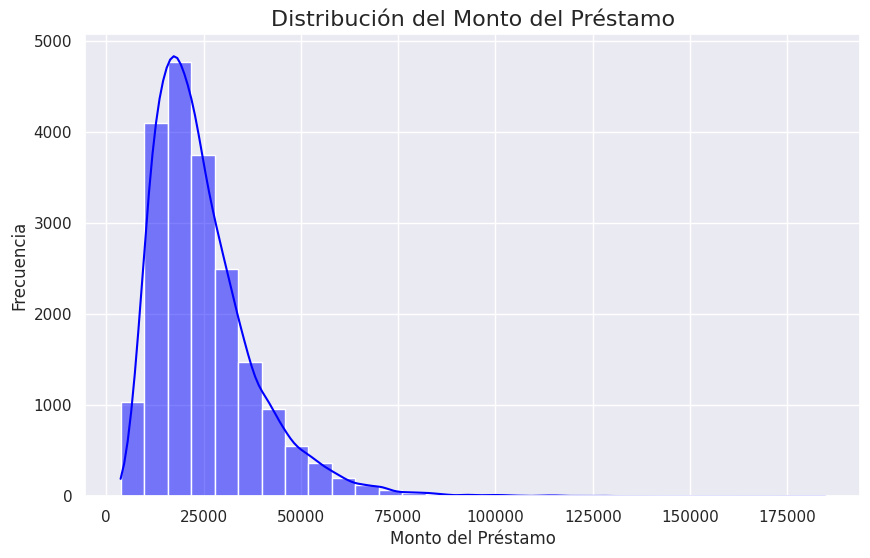

In [ ]:
# @title Cantidad de préstamo solicitado - Loan Amount
# Graficar el histograma de la columna 'LoanAmount'
plt.figure(figsize=(10, 6))
sns.histplot(df['LoanAmount'], kde=True, bins=30, color='blue')

plt.title('Distribución del Monto del Préstamo', fontsize=16)
plt.xlabel('Monto del Préstamo', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

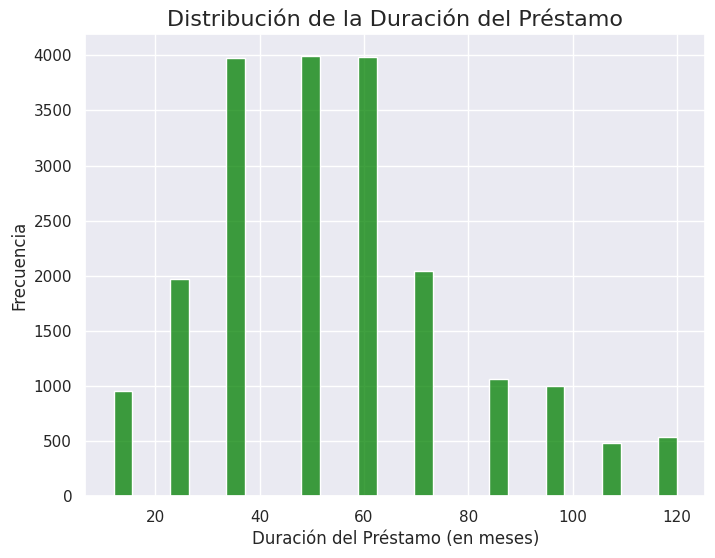

In [ ]:
# @title Duración del préstamo - Loan Duration
plt.figure(figsize=(8, 6))
sns.histplot(df['LoanDuration'], kde=False, bins=30, color='green')
plt.title('Distribución de la Duración del Préstamo', fontsize=16)
plt.xlabel('Duración del Préstamo (en meses)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

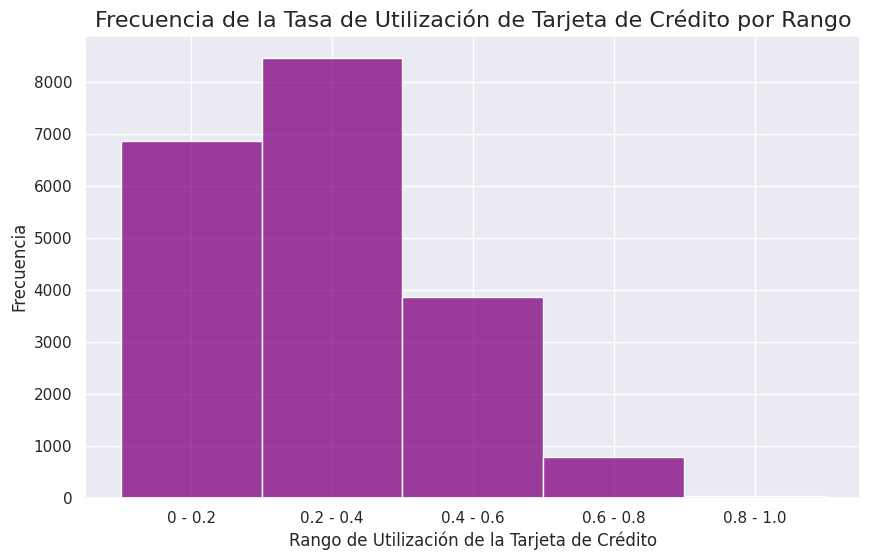

In [ ]:
# @title Credit Card Utilization Rate
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0']

df['Utilization Range'] = pd.cut(df['CreditCardUtilizationRate'], bins=bins, labels=labels, right=False)
plt.figure(figsize=(10, 6))
sns.histplot(df['Utilization Range'], discrete=True, color='purple', kde=False)
plt.title('Frecuencia de la Tasa de Utilización de Tarjeta de Crédito por Rango', fontsize=16)
plt.xlabel('Rango de Utilización de la Tarjeta de Crédito', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


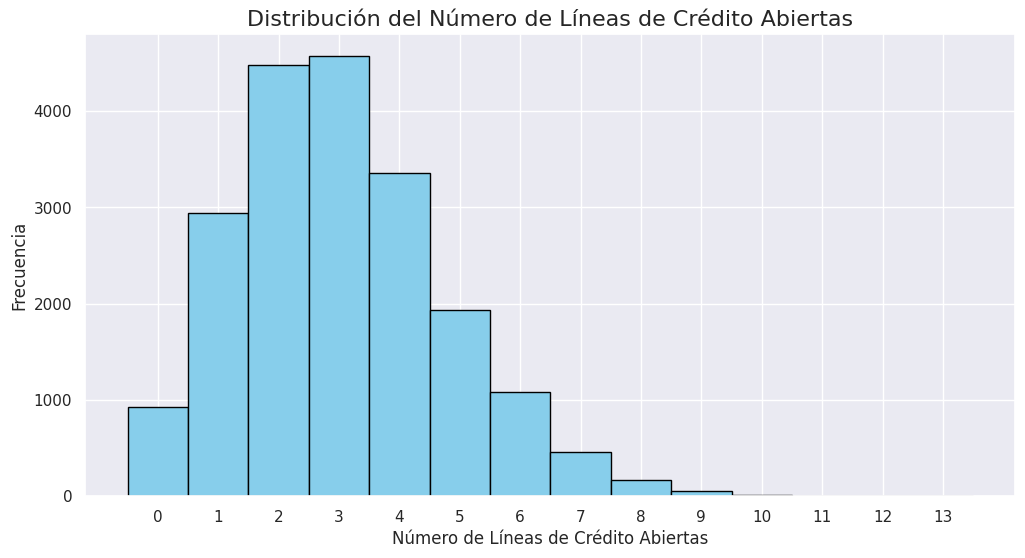

In [ ]:
# @title Number Of Open Credit Lines - Número de líneas crediticias abiertas
# Graficar el histograma sin intervalos, para los valores individuales
plt.figure(figsize=(12, 6))

# Graficar el histograma donde cada barra representa un valor único de 'Number Of Open Credit Lines'
plt.hist(df['NumberOfOpenCreditLines'], bins=range(int(df['NumberOfOpenCreditLines'].min()), int(df['NumberOfOpenCreditLines'].max()) + 2), color='skyblue', edgecolor='black', align='left')

# Agregar título y etiquetas
plt.title('Distribución del Número de Líneas de Crédito Abiertas', fontsize=16)
plt.xlabel('Número de Líneas de Crédito Abiertas', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Ajustar los ticks del eje X para que se vean bien
plt.xticks(range(int(df['NumberOfOpenCreditLines'].min()), int(df['NumberOfOpenCreditLines'].max()) + 1))

# Mostrar la gráfica
plt.show()


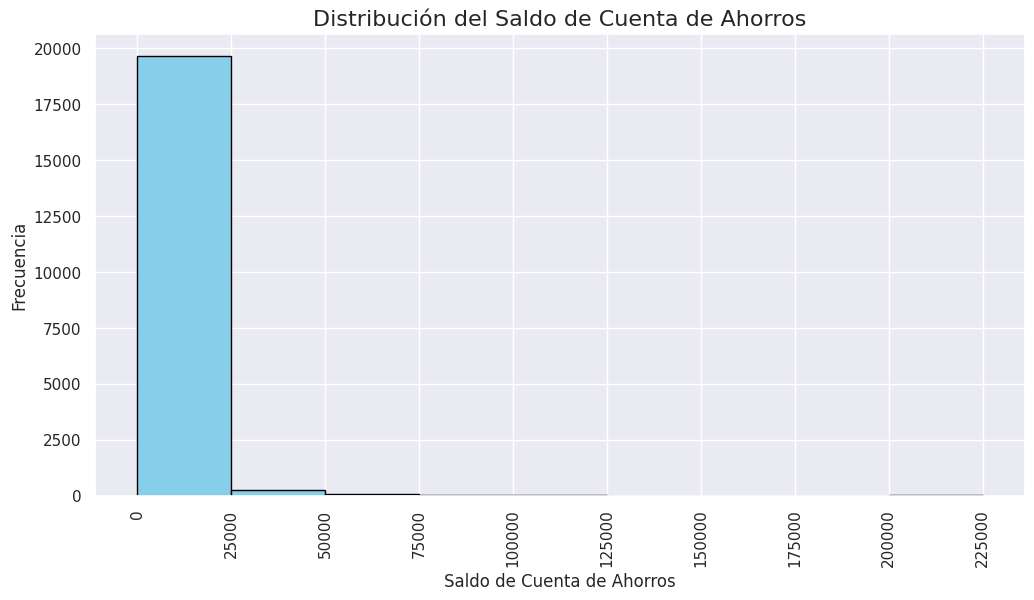

In [ ]:
# @title Saldo de la cuenta de ahorros
bin_edges = range(0, int(df['SavingsAccountBalance'].max()) + 25000, 25000)
counts, bins = pd.cut(df['SavingsAccountBalance'], bins=bin_edges, right=False, include_lowest=True, retbins=True)
plt.figure(figsize=(12, 6))
plt.hist(df['SavingsAccountBalance'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribución del Saldo de Cuenta de Ahorros', fontsize=16)
plt.xlabel('Saldo de Cuenta de Ahorros', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(bin_edges, rotation=90)
plt.show()

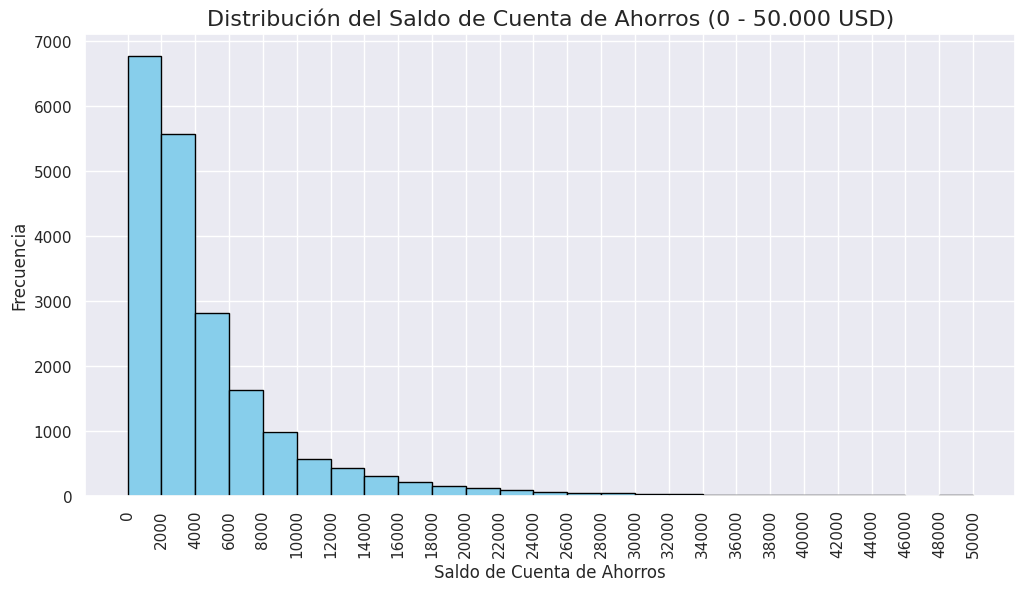

In [ ]:
# @title Saldo de la cuenta de ahorros (0 - 50.000)
bin_edges = range(0, 50000 + 2000, 2000)
counts, bins = pd.cut(df['SavingsAccountBalance'], bins=bin_edges, right=False, include_lowest=True, retbins=True)
plt.figure(figsize=(12, 6))
plt.hist(df['SavingsAccountBalance'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribución del Saldo de Cuenta de Ahorros (0 - 50.000 USD)', fontsize=16)
plt.xlabel('Saldo de Cuenta de Ahorros', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(bin_edges, rotation=90)
plt.show()

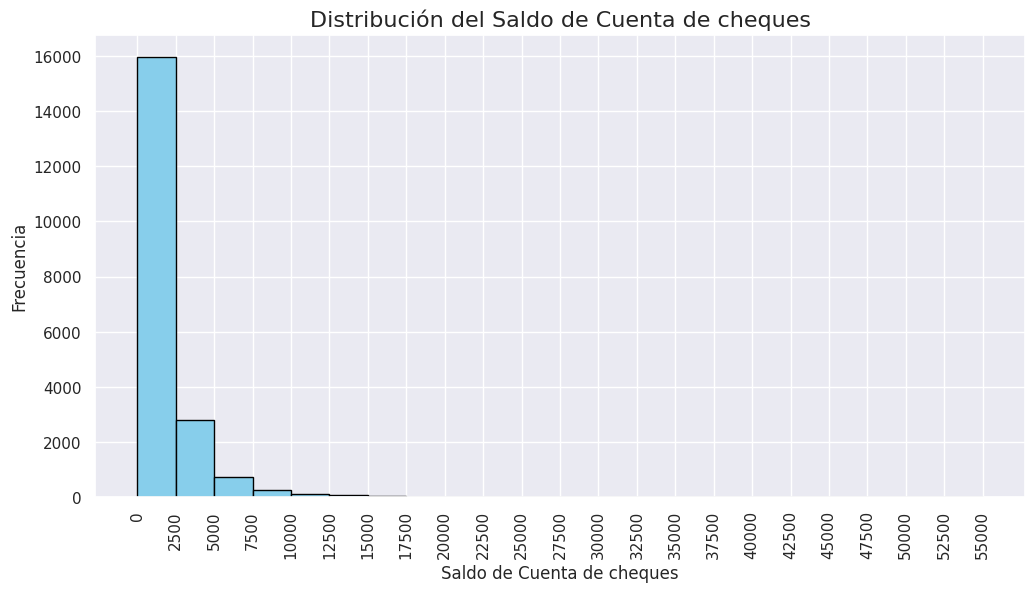

In [ ]:
# @title Saldo de cuenta de cheques
bin_edges = range(0, int(df['CheckingAccountBalance'].max()) + 2500, 2500)
counts, bins = pd.cut(df['CheckingAccountBalance'], bins=bin_edges, right=False, include_lowest=True, retbins=True)
plt.figure(figsize=(12, 6))
plt.hist(df['CheckingAccountBalance'], bins=bin_edges, color='skyblue', edgecolor='black')
plt.title('Distribución del Saldo de Cuenta de cheques', fontsize=16)
plt.xlabel('Saldo de Cuenta de cheques', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(bin_edges, rotation=90)
plt.show()

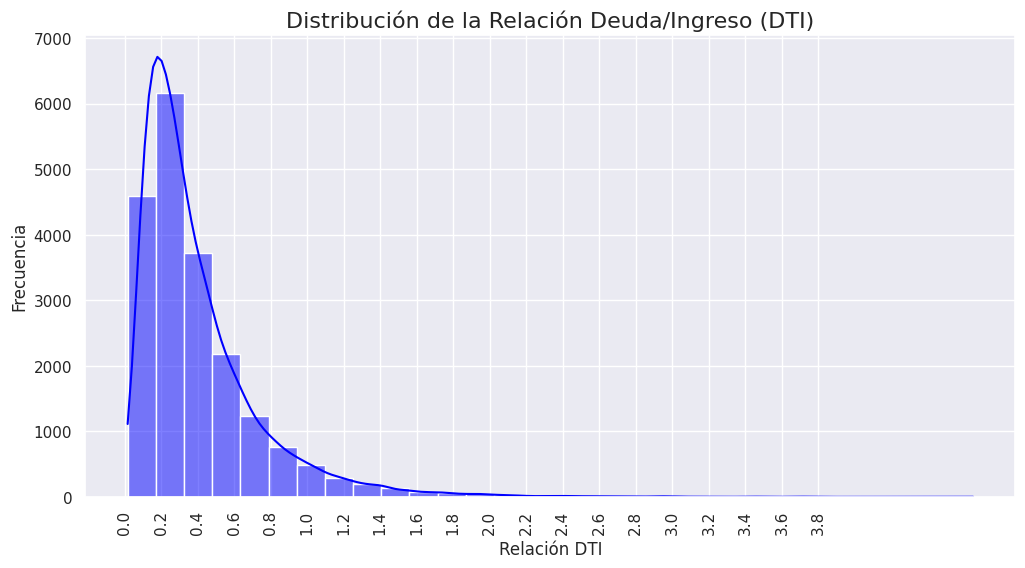

In [ ]:
# @title Relación Deudas/Ingresos (DTI)
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalDebtToIncomeRatio'], kde=True, bins=30, color='blue')

plt.xticks(ticks=[i / 5 for i in range(0, 20)], rotation=90)

plt.title('Distribución de la Relación Deuda/Ingreso (DTI)', fontsize=16)
plt.xlabel('Relación DTI', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

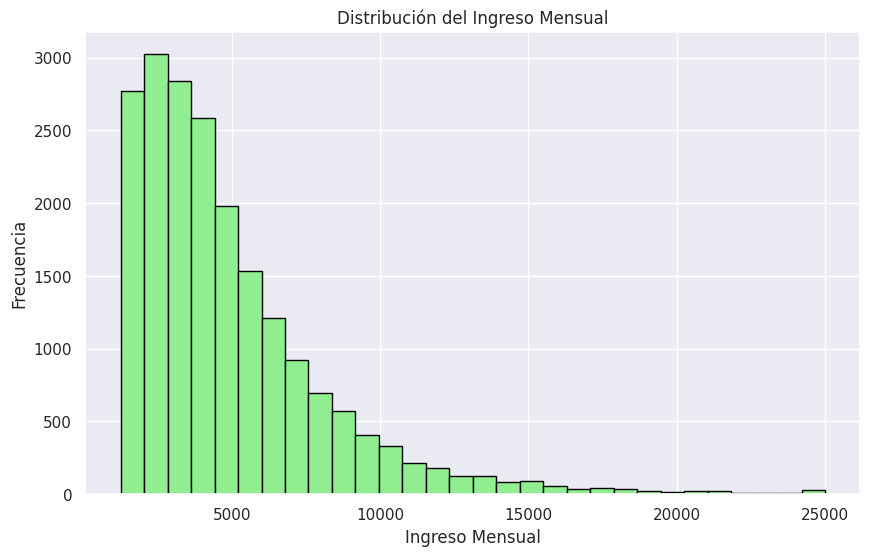

In [ ]:
# @title Ingreso mensual
plt.figure(figsize=(10,6))
plt.hist(df['MonthlyIncome'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución del Ingreso Mensual')
plt.xlabel('Ingreso Mensual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

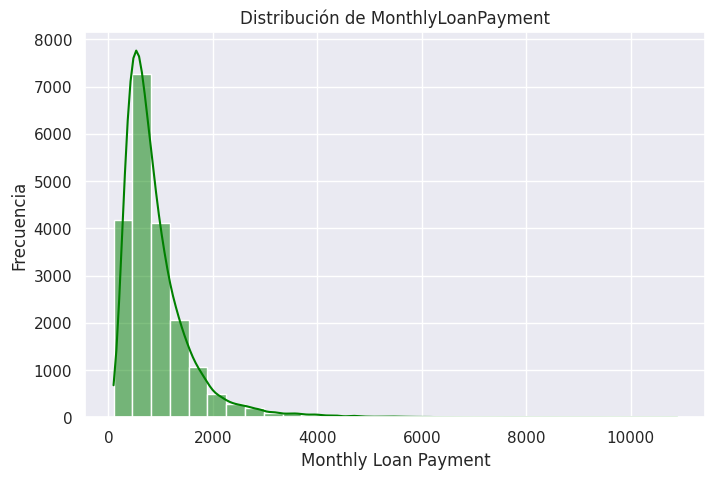

In [ ]:
# @title Pago mensual del préstamo
plt.figure(figsize=(8, 5))
sns.histplot(df["MonthlyLoanPayment"], bins=30, kde=True, color="green")
plt.title("Distribución de MonthlyLoanPayment")
plt.xlabel("Monthly Loan Payment")
plt.ylabel("Frecuencia")
plt.show()

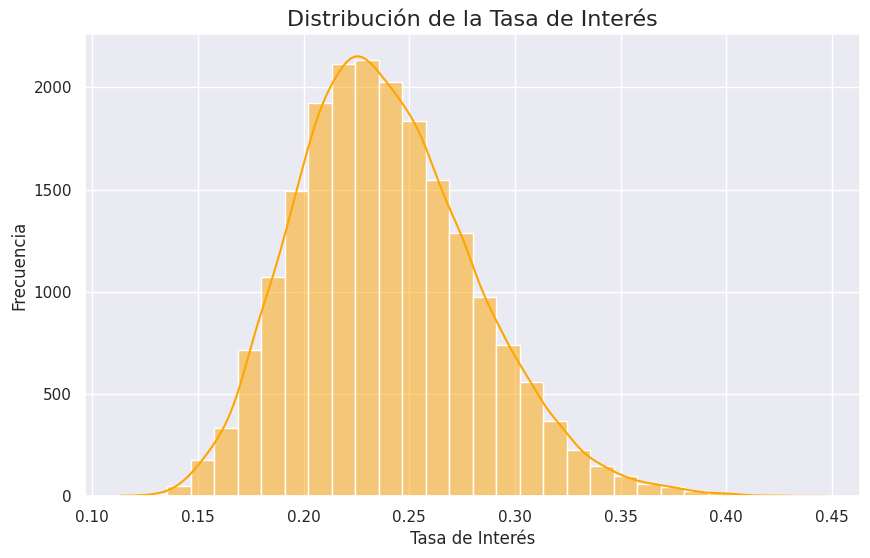

In [ ]:
# @title Tasa de interés
plt.figure(figsize=(10, 6))
sns.histplot(df['InterestRate'], kde=True, bins=30, color='orange')
plt.title('Distribución de la Tasa de Interés', fontsize=16)
plt.xlabel('Tasa de Interés', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()

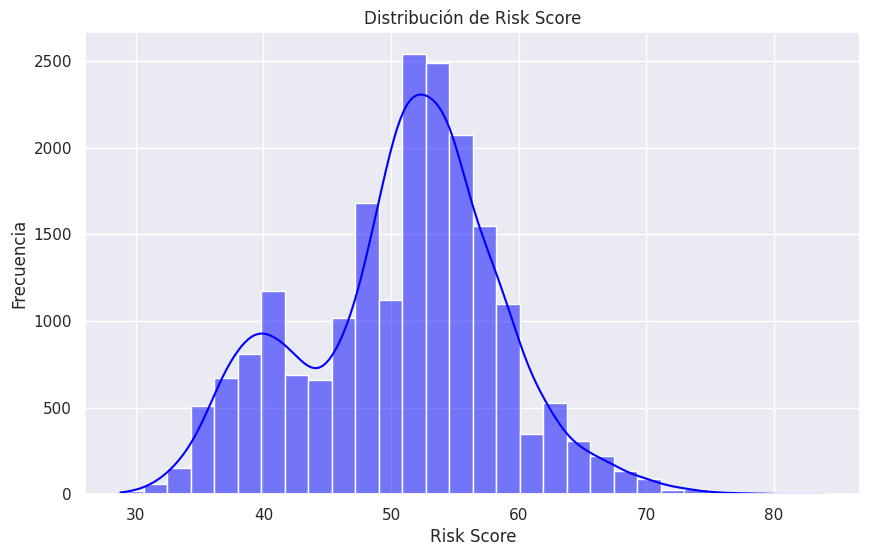

In [ ]:
# @title Risk Score
plt.figure(figsize=(10, 6))
sns.histplot(df['RiskScore'], bins=30, kde=True, color='blue')
plt.title('Distribución de Risk Score')
plt.xlabel('Risk Score')
plt.ylabel('Frecuencia')
plt.show()

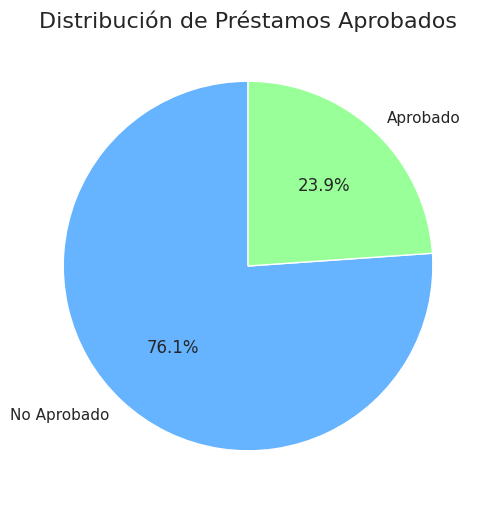

In [ ]:
# @title Distribución de préstamos aprobados
loan_approval_counts = df['LoanApproved'].value_counts()
labels = ['Aprobado' if label == 1 else 'No Aprobado' for label in loan_approval_counts.index]
plt.figure(figsize=(6, 6))
plt.pie(loan_approval_counts, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99'], startangle=90)
plt.title('Distribución de Préstamos Aprobados', fontsize=16)
plt.show()

#Sección 2

## CONVERSIÓN COLUMNAS CATEGÓRICAS A VALORES NUMÉRICOS

In [ ]:
print(df.dtypes)

Age                              int64
AnnualIncome                     int64
CreditScore                      int64
EmploymentStatus                object
EducationLevel                  object
Experience                       int64
LoanAmount                       int64
LoanDuration                     int64
MaritalStatus                   object
NumberOfDependents               int64
HomeOwnershipStatus             object
MonthlyDebtPayments              int64
CreditCardUtilizationRate      float64
NumberOfOpenCreditLines          int64
NumberOfCreditInquiries          int64
DebtToIncomeRatio              float64
BankruptcyHistory                int64
LoanPurpose                     object
PreviousLoanDefaults             int64
PaymentHistory                   int64
LengthOfCreditHistory            int64
SavingsAccountBalance            int64
CheckingAccountBalance           int64
TotalAssets                      int64
TotalLiabilities                 int64
MonthlyIncome            

In [ ]:
# Identificar columnas categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Mostrar las columnas categóricas y sus valores únicos
for col in categorical_columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {df[col].unique()}")
    print()

# Convertir las columnas categóricas a números
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

# Verificar los cambios
print(df.head())

Columna: EmploymentStatus
Valores únicos: ['Employed' 'Self-Employed' 'Unemployed']

Columna: EducationLevel
Valores únicos: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']

Columna: MaritalStatus
Valores únicos: ['Married' 'Single' 'Divorced' 'Widowed']

Columna: HomeOwnershipStatus
Valores únicos: ['Own' 'Mortgage' 'Rent' 'Other']

Columna: LoanPurpose
Valores únicos: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']

Columna: Age groups
Valores únicos: [(40, 50], (30, 40], (50, 60], (10, 20], (20, 30], (60, 70], (70, 80]]
Categories (7, interval[int64, right]): [(10, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] <
                                         (60, 70] < (70, 80]]

Columna: Utilization Range
Valores únicos: ['0.2 - 0.4', '0 - 0.2', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0']
Categories (5, object): ['0 - 0.2' < '0.2 - 0.4' < '0.4 - 0.6' < '0.6 - 0.8' < '0.8 - 1.0']

   Age  AnnualIncome  CreditScore  EmploymentStatus  EducationLevel  \
0   45         39948

In [ ]:
print(df.dtypes)

Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus                 int8
EducationLevel                   int8
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                    int8
NumberOfDependents              int64
HomeOwnershipStatus              int8
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                      int8
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncome                 float64
UtilityBills

## ESTIMADORES

In [ ]:
X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Decision Tree

In [ ]:
est = DecisionTreeClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9855


Age: 0.0003
AnnualIncome: 0.0010
CreditScore: 0.0076
EmploymentStatus: 0.0008
EducationLevel: 0.0003
Experience: 0.0000
LoanAmount: 0.0026
LoanDuration: 0.0036
MaritalStatus: 0.0006
NumberOfDependents: 0.0005
HomeOwnershipStatus: 0.0000
MonthlyDebtPayments: 0.0019
CreditCardUtilizationRate: 0.0017
NumberOfOpenCreditLines: 0.0000
NumberOfCreditInquiries: 0.0001
DebtToIncomeRatio: 0.0482
BankruptcyHistory: 0.0029
LoanPurpose: 0.0000
PreviousLoanDefaults: 0.0014
PaymentHistory: 0.0008
LengthOfCreditHistory: 0.0015
SavingsAccountBalance: 0.0001
CheckingAccountBalance: 0.0004
TotalAssets: 0.0050
TotalLiabilities: 0.0001
MonthlyIncome: 0.0056
UtilityBillsPaymentHistory: 0.0011
JobTenure: 0.0000
NetWorth: 0.0032
BaseInterestRate: 0.0005
InterestRate: 0.0050
MonthlyLoanPayment: 0.0014
TotalDebtToIncomeRatio: 0.0454
RiskScore: 0.8562
Age groups: 0.0000
Utilization Range: 0.0000


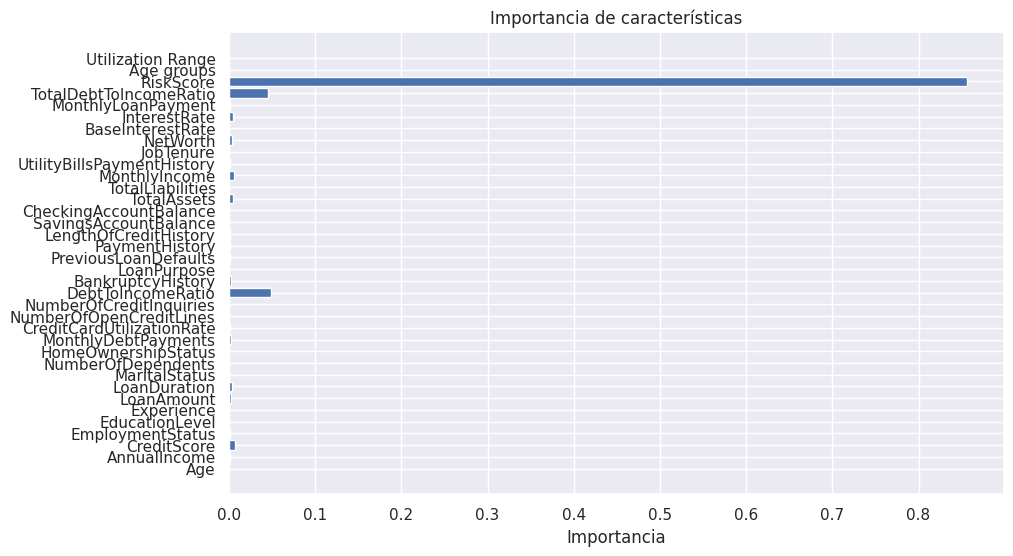

In [ ]:
est.fit(X_train, y_train)
importancias = est.feature_importances_

for name, importance in zip(X_train.columns, importancias):
    print(f"{name}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(X_train.columns, importancias)
plt.xlabel('Importancia')
plt.title('Importancia de características')
plt.show()

## Random Forest

In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9905


## SVM

In [ ]:
from sklearn.svm import SVC
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.88225


## LEARNING CURVES

###  Decision Tree (max_depth)



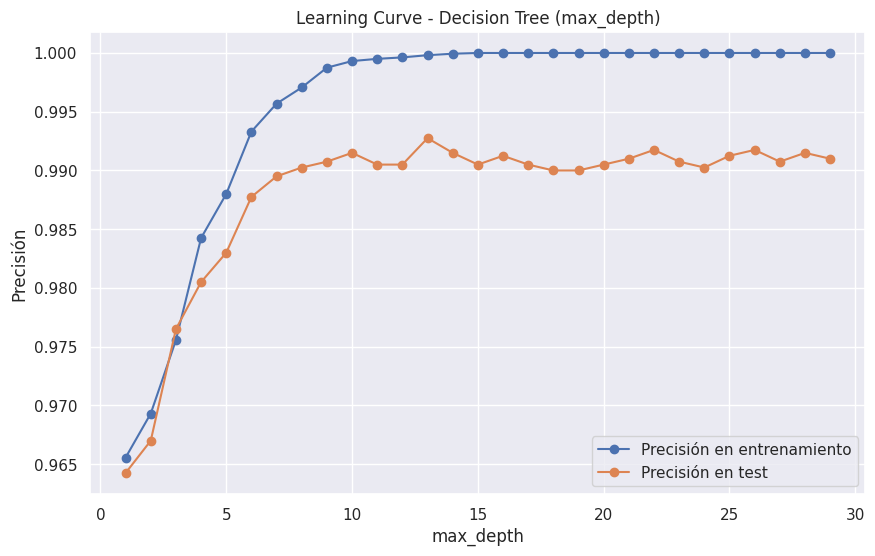

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

train_accuracies = []
test_accuracies = []
depths = range(1, 30)

for d in depths:
    est = DecisionTreeClassifier(max_depth=d)
    est.fit(X_train, y_train)

    # Precisión en entrenamiento
    train_acc = accuracy_score(y_train, est.predict(X_train))
    train_accuracies.append(train_acc)

    # Precisión en test
    test_acc = accuracy_score(y_test, est.predict(X_test))
    test_accuracies.append(test_acc)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Precisión en entrenamiento', marker='o')
plt.plot(depths, test_accuracies, label='Precisión en test', marker='o')
plt.xlabel('max_depth')
plt.ylabel('Precisión')
plt.title('Learning Curve - Decision Tree (max_depth)')
plt.legend()
plt.grid(True)
plt.show()


### Random Forest (n_estimators)

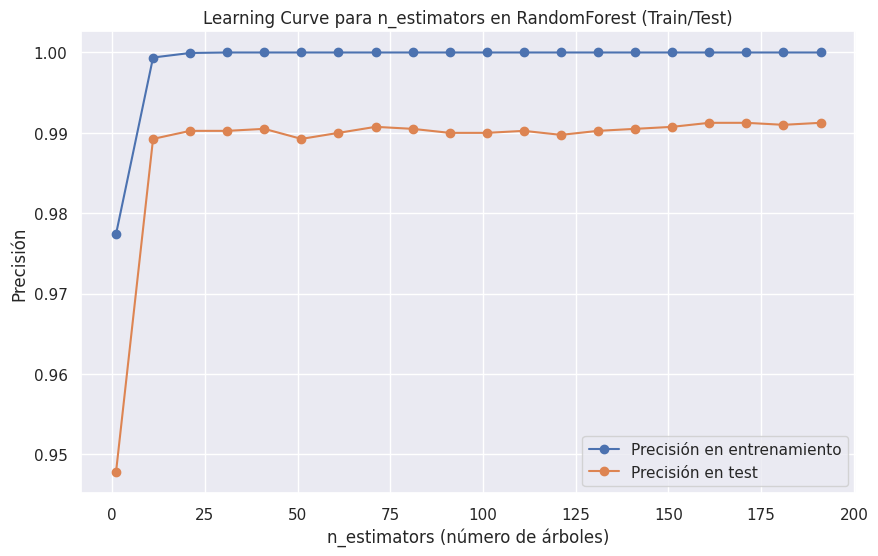

In [ ]:
train_accuracies = []
test_accuracies = []
estimators = range(1, 201, 10)  # Probar n_estimators desde 1 hasta 200 en pasos de 10

for n in estimators:
    est = RandomForestClassifier(n_estimators=n, random_state=0)
    est.fit(X_train, y_train)

    # Precisión en entrenamiento
    train_acc = accuracy_score(y_train, est.predict(X_train))
    train_accuracies.append(train_acc)

    # Precisión en test
    test_acc = accuracy_score(y_test, est.predict(X_test))
    test_accuracies.append(test_acc)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(estimators, train_accuracies, label='Precisión en entrenamiento', marker='o')
plt.plot(estimators, test_accuracies, label='Precisión en test', marker='o')
plt.xlabel('n_estimators (número de árboles)')
plt.ylabel('Precisión')
plt.title('Learning Curve para n_estimators en RandomForest (Train/Test)')
plt.legend()
plt.grid(True)
plt.show()

### SVM (kernel)

In [ ]:
from sklearn.svm import SVC
est = SVC(kernel="rbf",random_state=1)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.88225


In [ ]:
from sklearn.svm import SVC
est = SVC(kernel="poly",random_state=1)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.87


In [ ]:
from sklearn.svm import SVC

X_small = X_train[:1000]
y_small = y_train[:1000]

est = SVC(kernel="linear",random_state=1)
est.fit(X_small, y_small)
print(accuracy_score(est.predict(X_test), y_test))

0.926


In [ ]:
from sklearn.svm import SVC
est = SVC(kernel="linear",random_state=1)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.95875


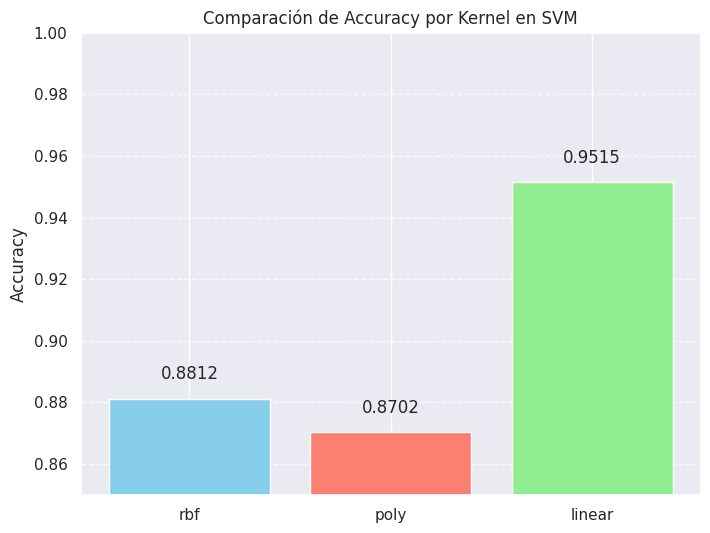

In [ ]:
# @title Comparación del rendimiento de SVM según el Kernel
kernels = ['rbf', 'poly', 'linear']
accuracies = [0.88125, 0.87025, 0.9515]

plt.figure(figsize=(8, 6))
bars = plt.bar(kernels, accuracies, color=['skyblue', 'salmon', 'lightgreen'])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005, f'{height:.4f}', ha='center', va='bottom')

plt.ylim(0.85, 1)
plt.ylabel('Accuracy')
plt.title('Comparación de Accuracy por Kernel en SVM')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Learning Curve (Cross Validation - Decision Tree)

In [ ]:
est = DecisionTreeClassifier()
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print (s)
print ("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

[0.9945 0.9935 0.9855 0.985  0.993  0.992  0.9915 0.987  0.99   0.99  ]
accuracy 0.990 (+/- 0.00319)


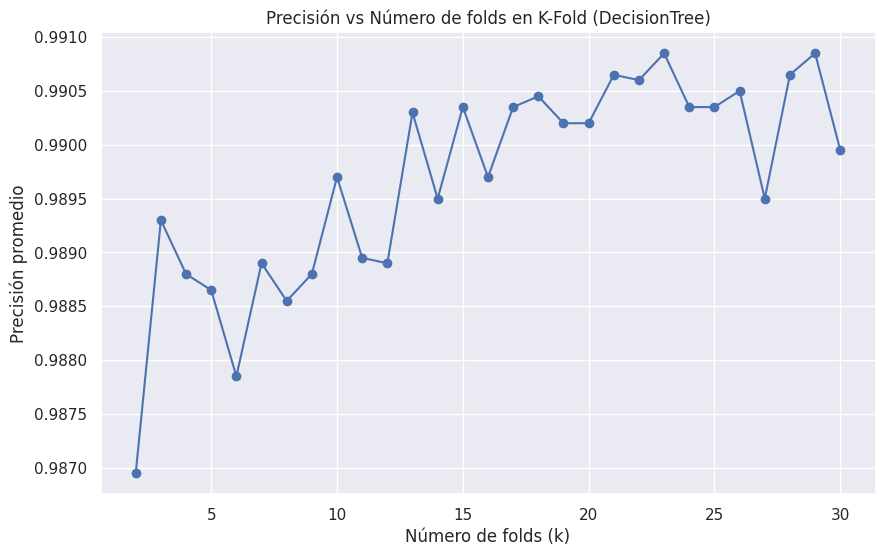

Mejor k: 23 con accuracy promedio de 0.9908


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

k_values = range(2, 31)  # Probar k de 2 a 30
mean_scores = []
std_scores = []

for k in k_values:
    est = DecisionTreeClassifier(random_state=0)

    scores = cross_val_score(est, X, y, cv=KFold(n_splits=k, shuffle=True, random_state=0), scoring=make_scorer(accuracy_score))

    mean_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

# Graficar
plt.figure(figsize=(10, 6))
plt.errorbar(k_values, mean_scores, fmt='-o', capsize=4)
#plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='-o', capsize=4)
plt.xlabel('Número de folds (k)')
plt.ylabel('Precisión promedio')
plt.title('Precisión vs Número de folds en K-Fold (DecisionTree)')
plt.grid(True)
plt.show()

# Encontrar el mejor k
best_k = k_values[np.argmax(mean_scores)]
best_acc = max(mean_scores)

best_k_std = k_values[np.argmin(std_scores)]
best_std = min(std_scores)

print(f"Mejor k: {best_k} con accuracy promedio de {best_acc:.4f}")
#print(f"Mejor k basado en menor desviación estándar: {best_k_std} con desviación estándar = {best_std:.5f}")

In [ ]:
resultados = list(zip(k_values, mean_scores))
resultados_ordenados = sorted(resultados, key=lambda x: x[1])  # Ordena según el accuracy

for k, score in resultados_ordenados:
    print(f"k = {k}, accuracy promedio = {score:.4f}")

k = 2, accuracy promedio = 0.9869
k = 6, accuracy promedio = 0.9878
k = 8, accuracy promedio = 0.9886
k = 5, accuracy promedio = 0.9887
k = 9, accuracy promedio = 0.9888
k = 4, accuracy promedio = 0.9888
k = 12, accuracy promedio = 0.9889
k = 7, accuracy promedio = 0.9889
k = 11, accuracy promedio = 0.9889
k = 3, accuracy promedio = 0.9893
k = 27, accuracy promedio = 0.9895
k = 14, accuracy promedio = 0.9895
k = 10, accuracy promedio = 0.9897
k = 16, accuracy promedio = 0.9897
k = 30, accuracy promedio = 0.9899
k = 19, accuracy promedio = 0.9902
k = 20, accuracy promedio = 0.9902
k = 13, accuracy promedio = 0.9903
k = 17, accuracy promedio = 0.9903
k = 24, accuracy promedio = 0.9903
k = 15, accuracy promedio = 0.9903
k = 25, accuracy promedio = 0.9903
k = 18, accuracy promedio = 0.9904
k = 26, accuracy promedio = 0.9905
k = 22, accuracy promedio = 0.9906
k = 21, accuracy promedio = 0.9906
k = 28, accuracy promedio = 0.9907
k = 29, accuracy promedio = 0.9908
k = 23, accuracy promedio = 

#Sección 3

##RED NEURONAL

In [ ]:
import tensorflow as tf
from tensorflow import keras

### Modelo con 3 capas ocultas

In [ ]:
X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalización de datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9489 - loss: 0.1180
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9970 - loss: 0.0079
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9985 - loss: 0.0092
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9979 - loss: 0.0039
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.4836e-05
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.6514e-05
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 9.5012e-06
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.2292e-06
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 2.9318e-06
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.9669e-06


###Modelo con 6 capas ocultas

In [ ]:
X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalización de datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9426 - loss: 0.1305
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9982 - loss: 0.0059
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9987 - loss: 0.0045
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 4.6508e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9994 - loss: 0.0022
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9994 - loss: 0.0022
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 1.0000 - loss: 1.6682e-04
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9994 - loss: 0.0032
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 1.0000 - loss: 3.6108e-06
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 1.0000 - loss: 4.1828e-07


###Modelo con 10 capas ocultas

In [ ]:
X = df.drop(columns=['LoanApproved'])
y = df['LoanApproved']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Normalización de datos
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9218 - loss: 0.1673
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9971 - loss: 0.0111
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9989 - loss: 0.0047
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9991 - loss: 0.0022
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9996 - loss: 4.7294e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 1.3048e-06
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 1.0000 - loss: 9.3266e-07
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 1.0000 - loss: 6.1626e-07
Epoch 9/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 1.0000 - loss: 6.4575e-07
Epoch 10/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 1.0000 - loss: 1.3756e-07


##REDUCCIÓN DE DIMENSIONALIDAD

In [ ]:
from sklearn.decomposition import PCA

X = df.drop(columns=['LoanApproved'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

##APRENDIZAJE NO SUPERVISADO

###K-means

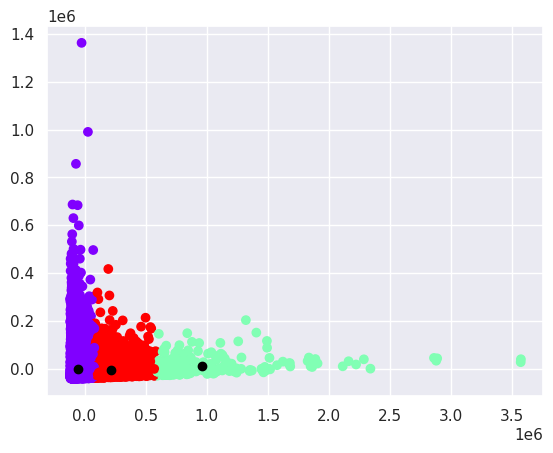

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
plt.scatter(X_pca[:,0],X_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

###DBSCAN

<ipython-input-69-c4d8498b05e0>:8: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



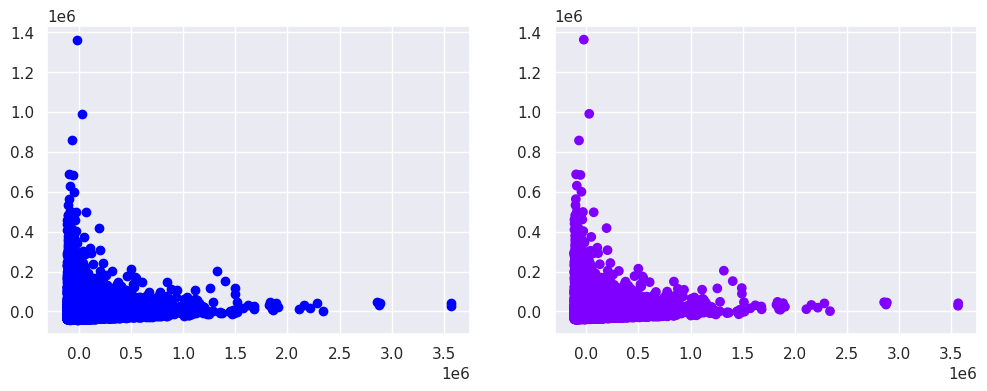

In [ ]:
from sklearn.cluster import DBSCAN

DBS = DBSCAN(min_samples=2)
DBS.fit(X_pca)

plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_pca[:,0], X_pca[:,1], c="blue", cmap='rainbow');
plt.subplot(122)
plt.scatter(X_pca[:,0],X_pca[:,1], c=DBS.labels_, cmap='rainbow');